In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [13]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df.shape

(10000, 14)

In [15]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [16]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [18]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [19]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [20]:
df = df.drop(["Surname","CustomerId","RowNumber"],axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
def visulaize(x,y,xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x,y],color=['red','green'],label=['exit','not exit'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel("No. of costumers",fontsize=20)
    plt.legend()

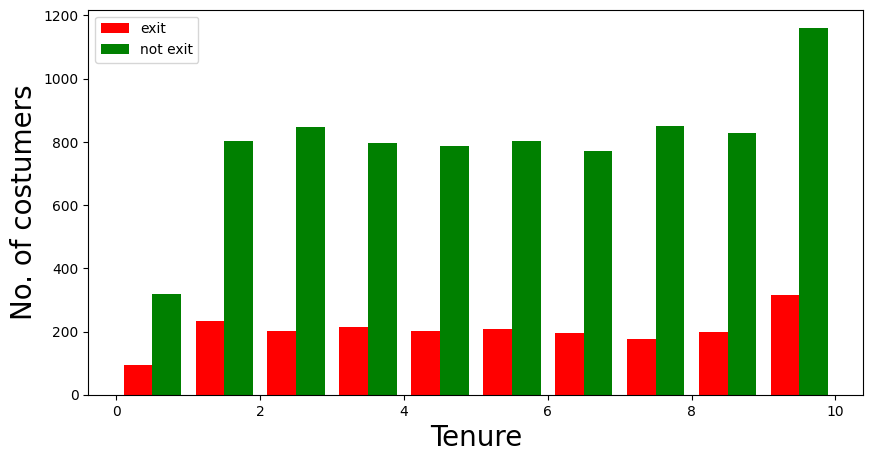

In [22]:
df_exited_1 = df[df["Exited"]==1]["Tenure"]
df_not_exited_1 = df[df["Exited"]==0]["Tenure"]
visulaize(df_exited_1,df_not_exited_1,"Tenure")

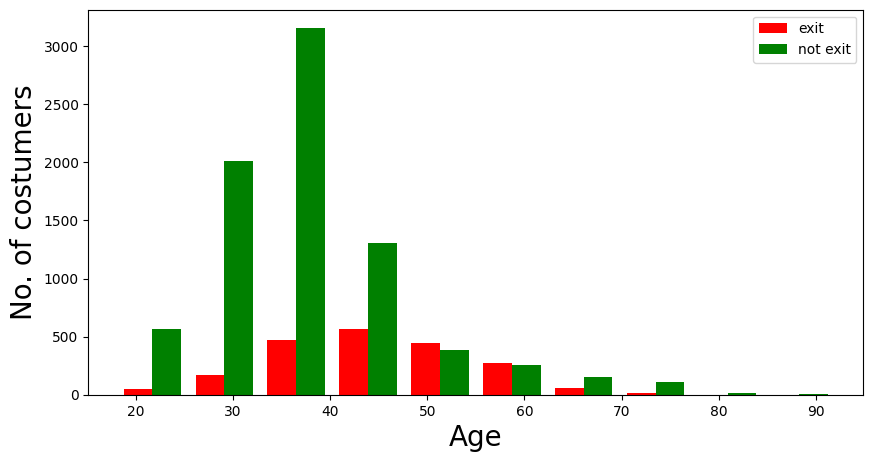

In [23]:
df_exited_2 = df[df["Exited"]==1]["Age"]
df_not_exited_2 = df[df["Exited"]==0]["Age"]
visulaize(df_exited_2,df_not_exited_2,"Age")

In [24]:
states = pd.get_dummies(df["Geography"])
gender = pd.get_dummies(df["Gender"])

In [25]:
df = pd.concat([df,states,gender],axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [26]:
data = df.drop(["Geography", "Gender"], axis=1)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [27]:
x = data.drop(["Exited"],axis=1)
y = data["Exited"]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.3,random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [30]:
xTrain = sc.fit_transform(xTrain)
xTest = sc.transform(xTest)

In [31]:
import keras

In [32]:
from keras.models import Sequential
from keras.layers import Dense

In [33]:
classifier = Sequential()

In [34]:
classifier.add(Dense(activation="relu",input_dim=13,units=6,kernel_initializer="uniform"))

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
classifier.add(Dense(activation="relu",units=6,kernel_initializer="uniform"))

In [36]:
classifier.add(Dense(activation="sigmoid",units=1,kernel_initializer="uniform"))

In [37]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [38]:
classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 6)              │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133 (532.00 B)

 Trainable params: 133 (532.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
classifier.fit(xTrain,yTrain,batch_size=10,epochs=50)

Epoch 1/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 827us/step - accuracy: 0.7888 - loss: 0.5670
Epoch 2/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 788us/step - accuracy: 0.7912 - loss: 0.4376
Epoch 3/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 977us/step - accuracy: 0.7963 - loss: 0.4313
Epoch 4/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - accuracy: 0.7960 - loss: 0.4329
Epoch 5/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step - accuracy: 0.8239 - loss: 0.4193
Epoch 6/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 892us/step - accuracy: 0.8230 - loss: 0.4234
Epoch 7/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 803us/step - accuracy: 0.8182 - loss: 0.4351
Epoch 8/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - accuracy: 0.8327 - loss: 0.4141
Epoch 9/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 847us/step - accuracy: 0.8341 - loss: 0.4177
Epoch 10/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.8403 - loss: 0.3994
Epoch 11/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step - accuracy: 0.8310 - loss: 0.4082
Epoch 12/50
700/700 ━━━━━━━━━━

In [41]:
yPred =classifier.predict(xTest)
yPred = (yPred > 0.5)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step


In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [44]:
print(confusion_matrix(yTest,yPred))

[[2344   72]
 [ 393  191]]


In [45]:
print(accuracy_score(yTest,yPred))

0.845


In [46]:
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2416
           1       0.73      0.33      0.45       584

    accuracy                           0.84      3000
   macro avg       0.79      0.65      0.68      3000
weighted avg       0.83      0.84      0.82      3000

